## KGFarm's feature selection

In [1]:
import sys
import pandas as pd

sys.path.append('../../')
from operations.api import KGFarm

kgfarm = KGFarm()

(Running in HITL (Human in the loop) mode)
Connected to Stardog!
Access the Stardog UI at: https://cloud.stardog.com/


In [2]:
entity_info = kgfarm.search_entity(entity_name='customer')
entity_info

,Entity,Physical_representation,Feature_view,Physical_table,Number_of_rows,File_source
0,customer_bank_stats,customer_id,Feature_view_03,bank_stats.csv,12162,/Users/shubhamvashisth/Documents/data/data_lake/bank-marketing-dataset/data/bank_stats.csv
1,customer_bank,customer_id,Feature_view_02,bank.csv,11162,/Users/shubhamvashisth/Documents/data/data_lake/bank-marketing-dataset/data/bank.csv
2,customer_churn,CustomerId,Feature_view_09,churn.csv,10000,/Users/shubhamvashisth/Documents/data/data_lake/churn-for-bank-customers/data/churn.csv
3,customer_Churn_Modelling,CustomerId,Feature_view_08,Churn_Modelling.csv,10000,/Users/shubhamvashisth/Documents/data/data_lake/bank-customer-churn-modeling/data/Churn_Modelling.csv


In [3]:
option = 0  # row number in enrichment_info dataframe

entity_df = pd.read_csv(entity_info.iloc[option].File_source)
print('entity dataframe: ', entity_info.iloc[option].Physical_table)
entity_df

entity dataframe:  bank_stats.csv


,event_timestamp,customer_id,age,balance,day,duration,campaign,pdays,previous,n_accounts,deposit,membership
0,2022-08-17 00:00:28.467705,C_17479,37,427,20,121,1,-1,0,2,1,no
1,2022-08-17 00:04:22.467705,C_14625,33,-482,29,90,3,-1,0,2,1,no
2,2022-08-17 00:07:08.467705,C_16989,29,0,12,33,2,-1,0,2,1,no
3,2022-08-17 00:07:44.467705,C_11214,33,87,12,978,1,-1,0,2,1,yes
4,2022-08-17 00:09:09.467705,C_10451,29,1445,26,328,2,143,2,2,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
12157,2022-08-25 23:54:36.467705,C_11590,53,2892,9,527,3,-1,0,2,1,yes
12158,2022-08-25 23:54:39.467705,C_08639,39,15,30,510,1,-1,0,2,1,yes
12159,2022-08-25 23:54:47.467705,C_12102,36,3158,3,144,2,-1,0,2,1,yes
12160,2022-08-25 23:58:33.467705,C_09824,73,542,26,355,1,180,5,2,1,yes


**Feature selection**<br>
KGFarm performs feature selection based on 2 modes: <b>pipeline</b> or <b>statistics</b> 
(ANOVA test is used to select the top features)<br>
kgfarm.select_features()</code>, takes the following parameters as input:
  1. entity dataframe
  2. depndent variable / target / label i.e. <i>y</i>
  3. <code>select_by</code> which can be <code>pipeline</code> or <code>statistics</code>

100%|████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 106.92it/s]

Analyzing features


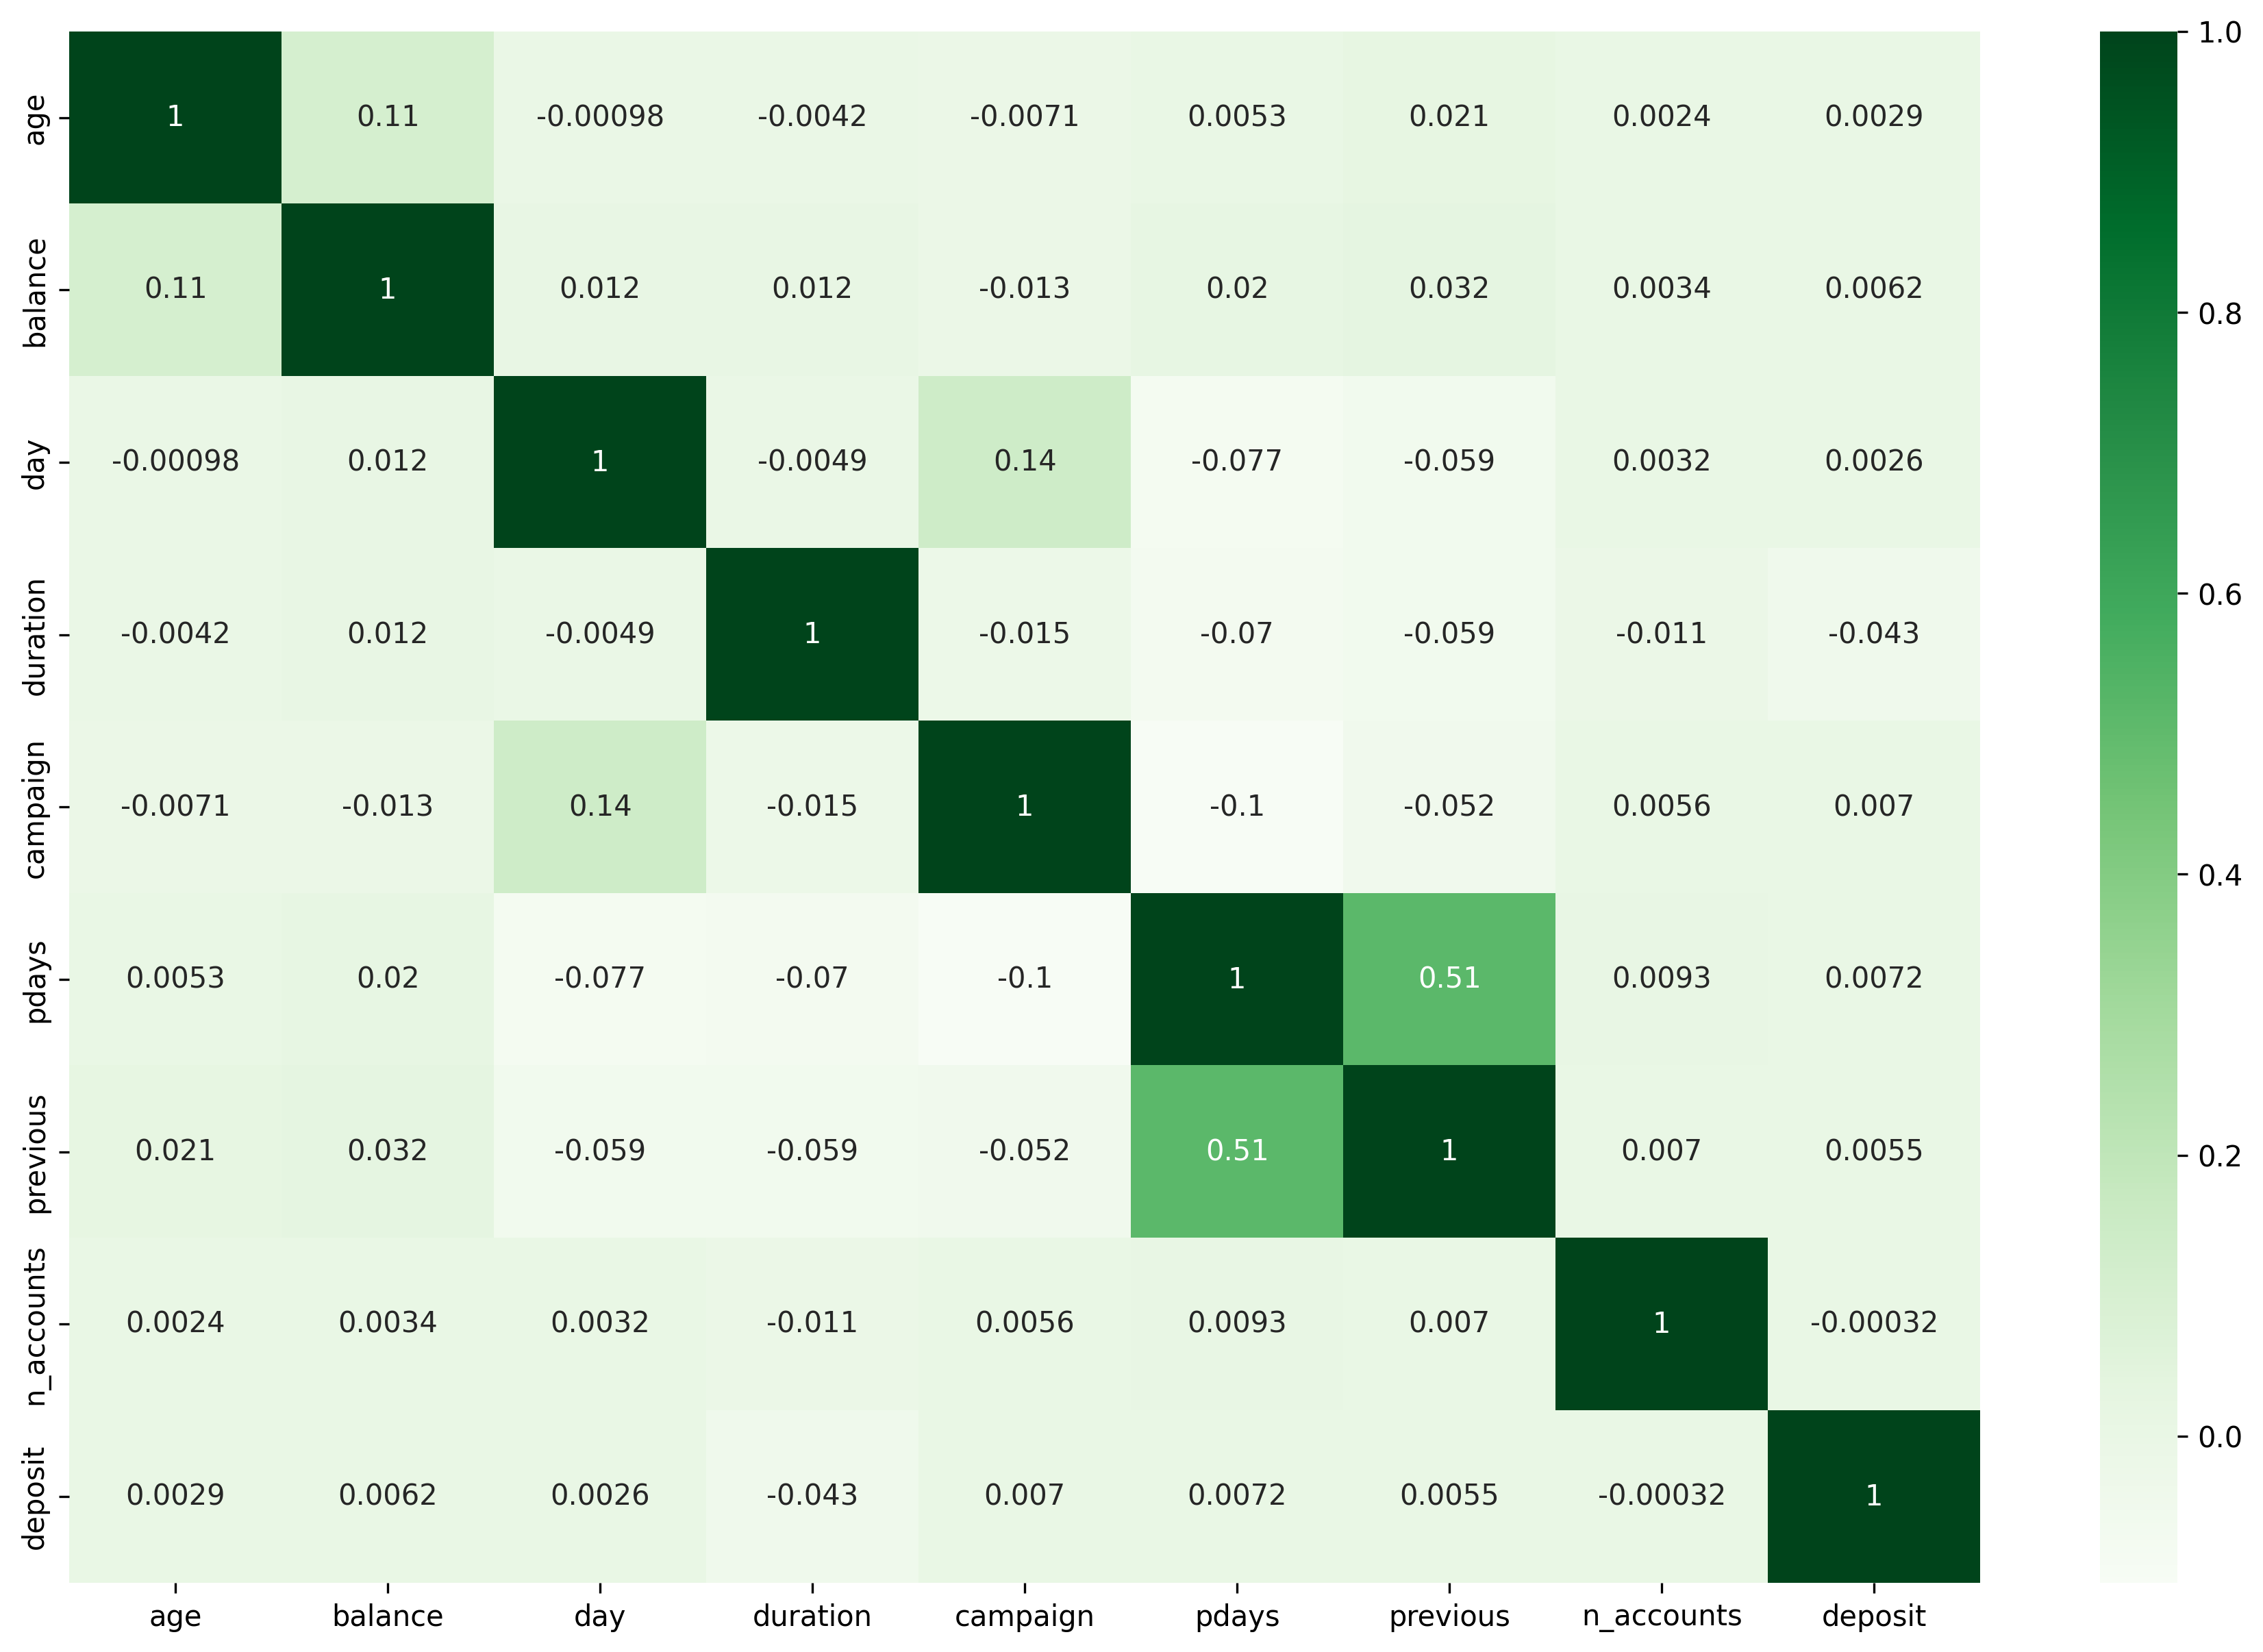

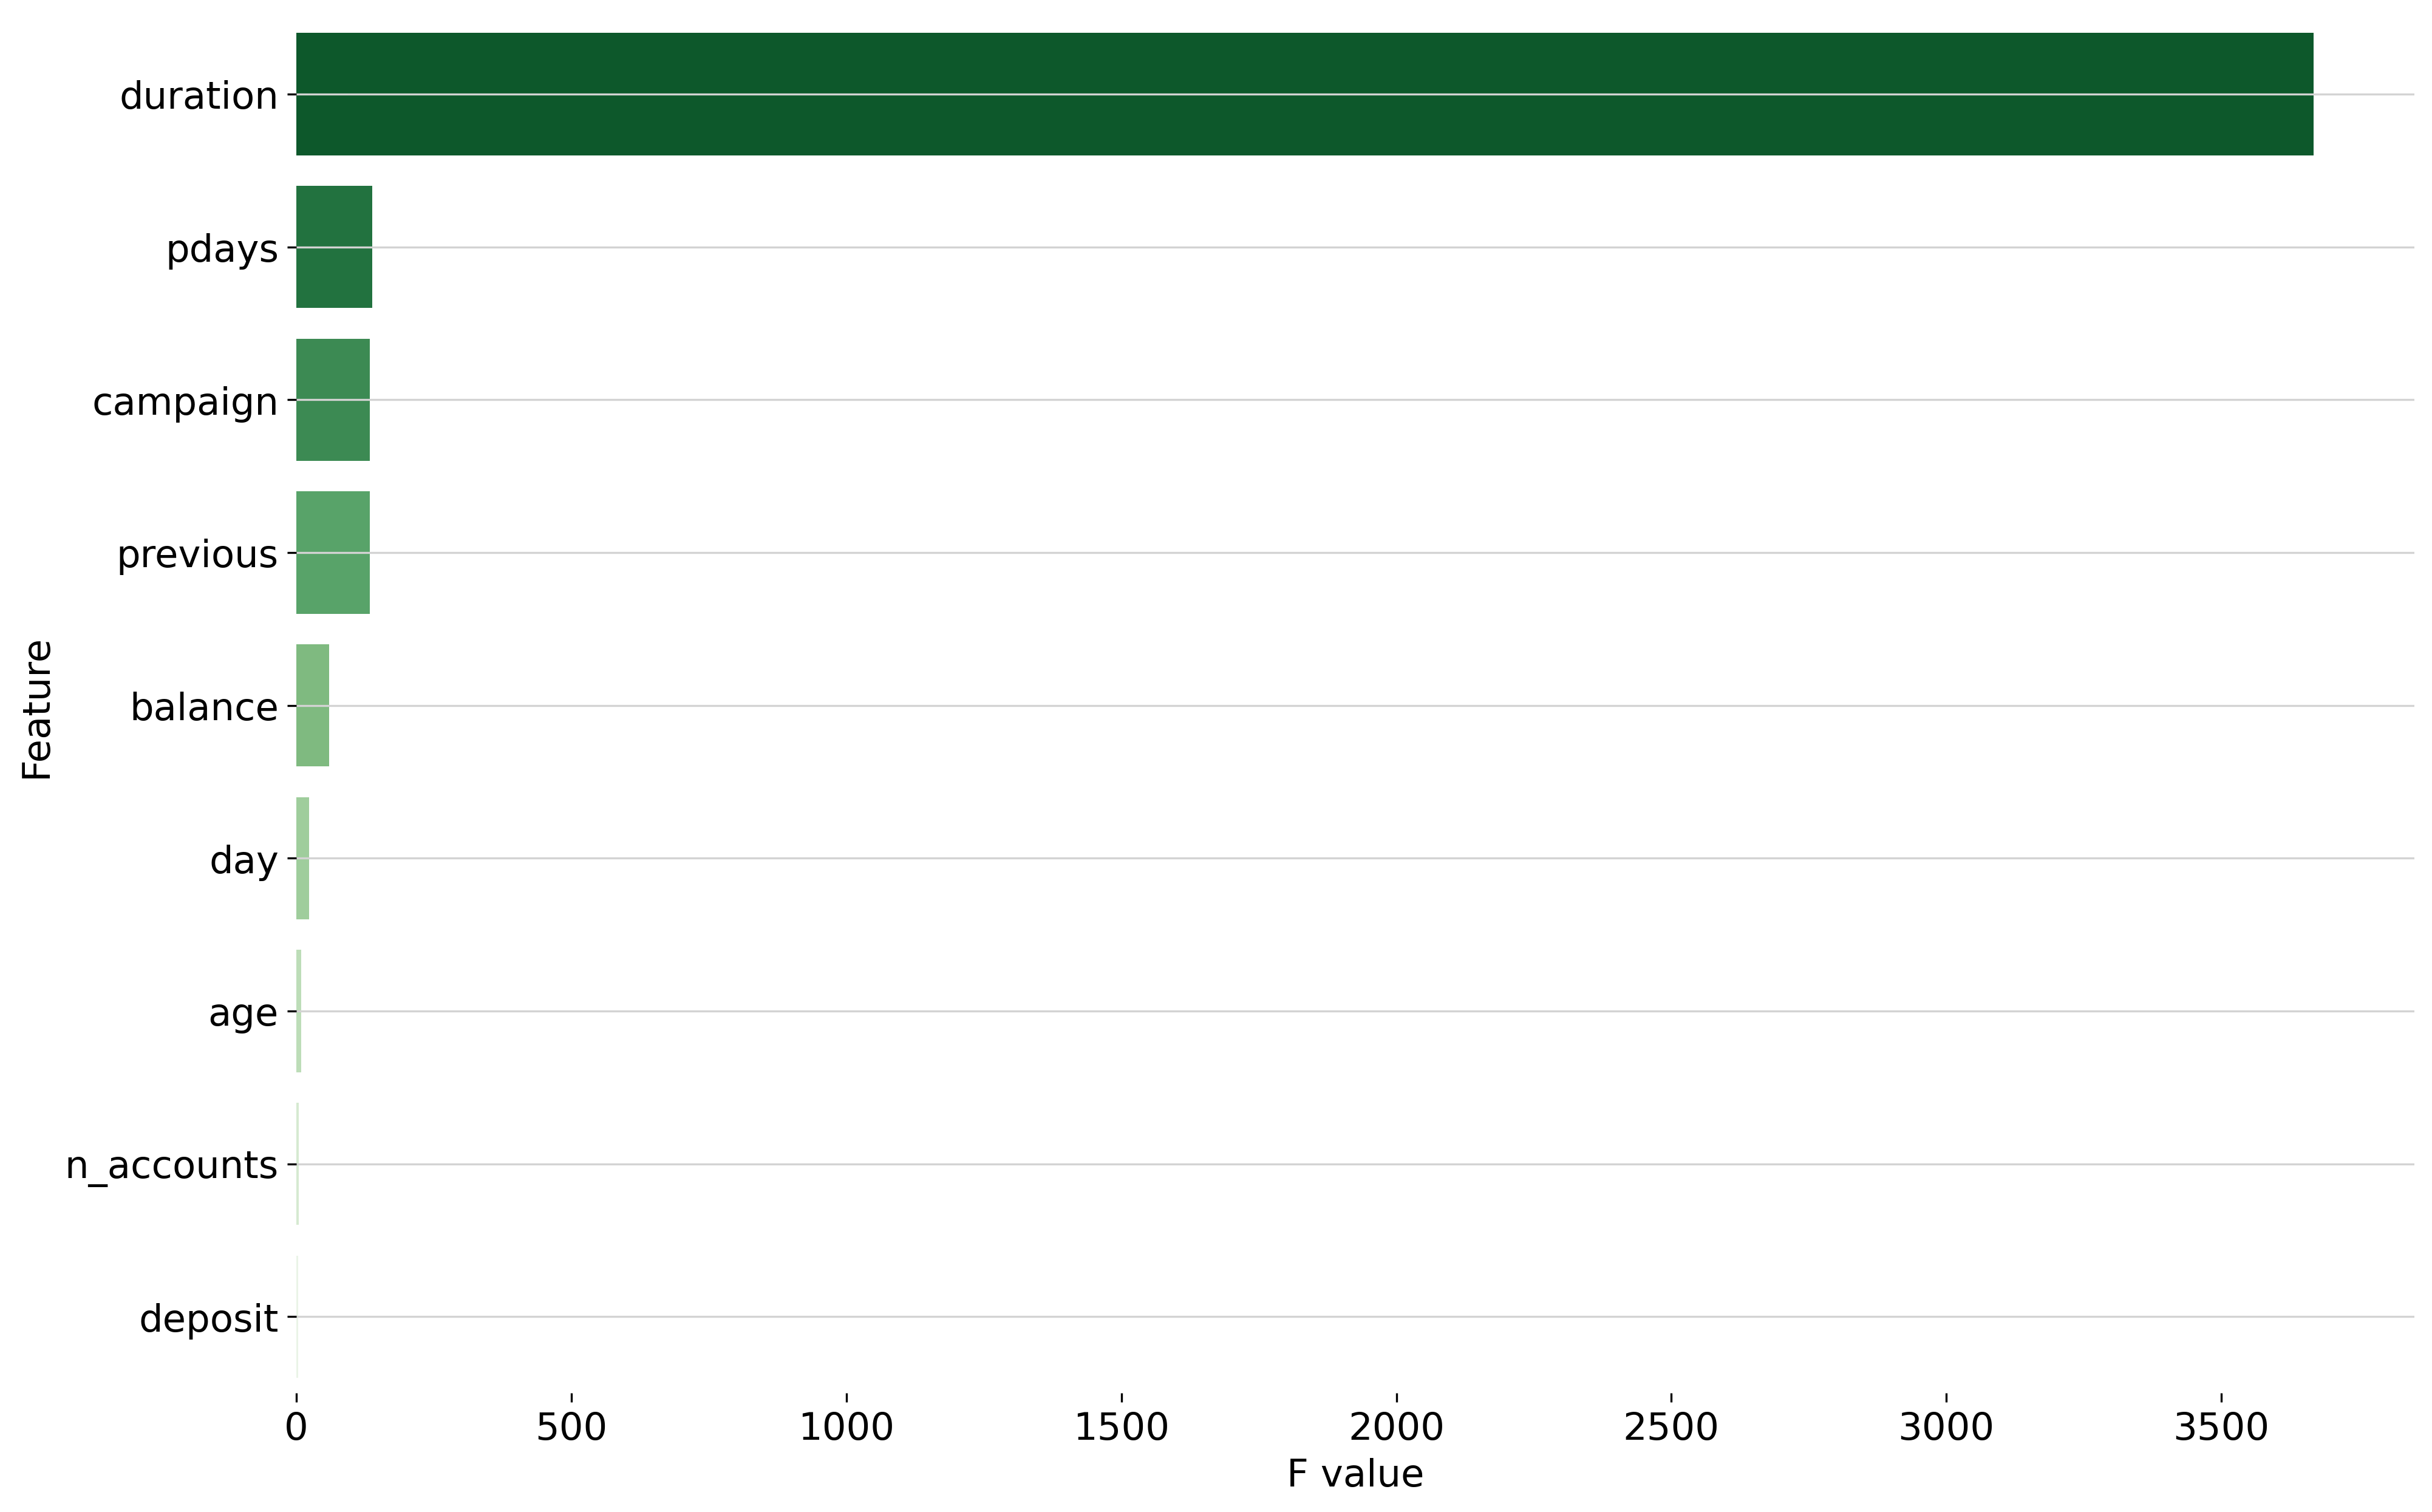

   F_value     Feature
0  3667.20    duration
1   137.74       pdays
2   133.63    campaign
3   133.53    previous
4    59.88     balance
5    22.74         day
6     8.68         age
7     4.67  n_accounts
8     2.80     deposit 

7 feature(s) ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] were selected based on previously abstracted pipelines


,age,balance,day,duration,campaign,pdays,previous
0,37,427,20,121,1,-1,0
1,33,-482,29,90,3,-1,0
2,29,0,12,33,2,-1,0
3,33,87,12,978,1,-1,0
4,29,1445,26,328,2,143,2
...,...,...,...,...,...,...,...
12157,53,2892,9,527,3,-1,0
12158,39,15,30,510,1,-1,0
12159,36,3158,3,144,2,-1,0
12160,73,542,26,355,1,180,5


In [4]:
X, y = kgfarm.select_features(entity_df, dependent_variable='membership', select_by='pipeline',
                             plot_correlation=True, plot_anova_test=True, show_f_value=True)
X

100%|████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 143.67it/s]

Analyzing features


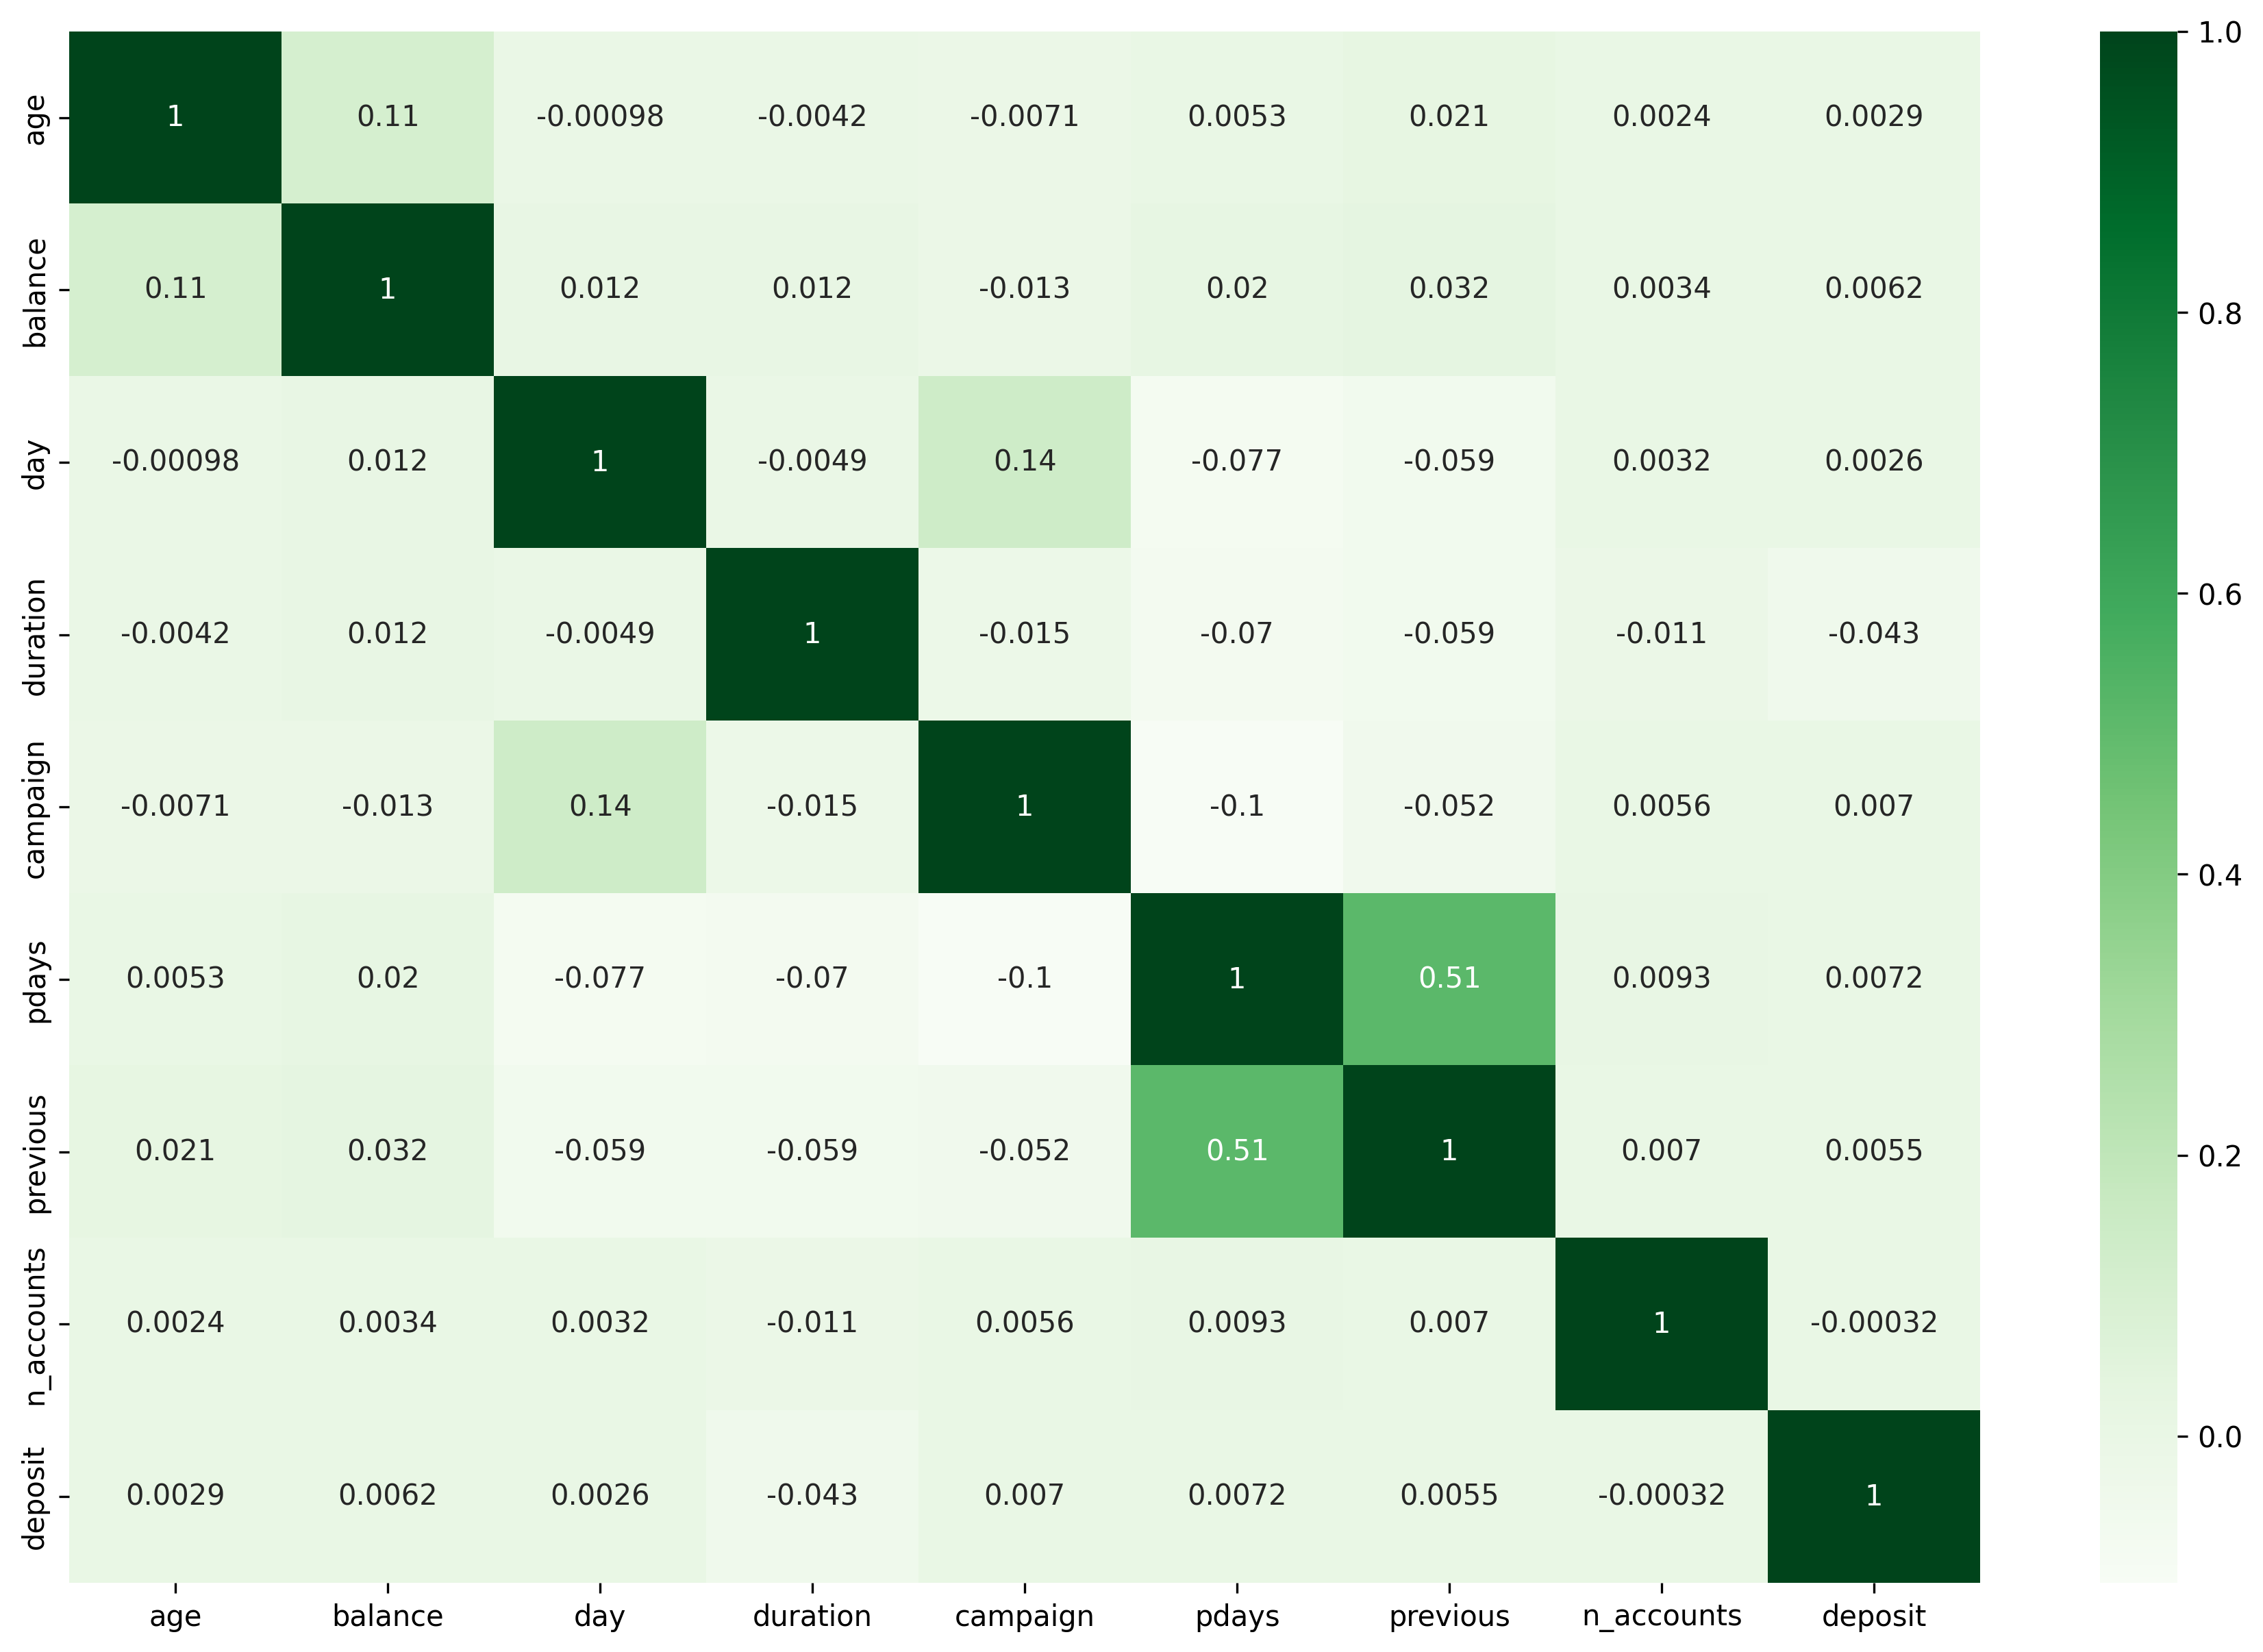

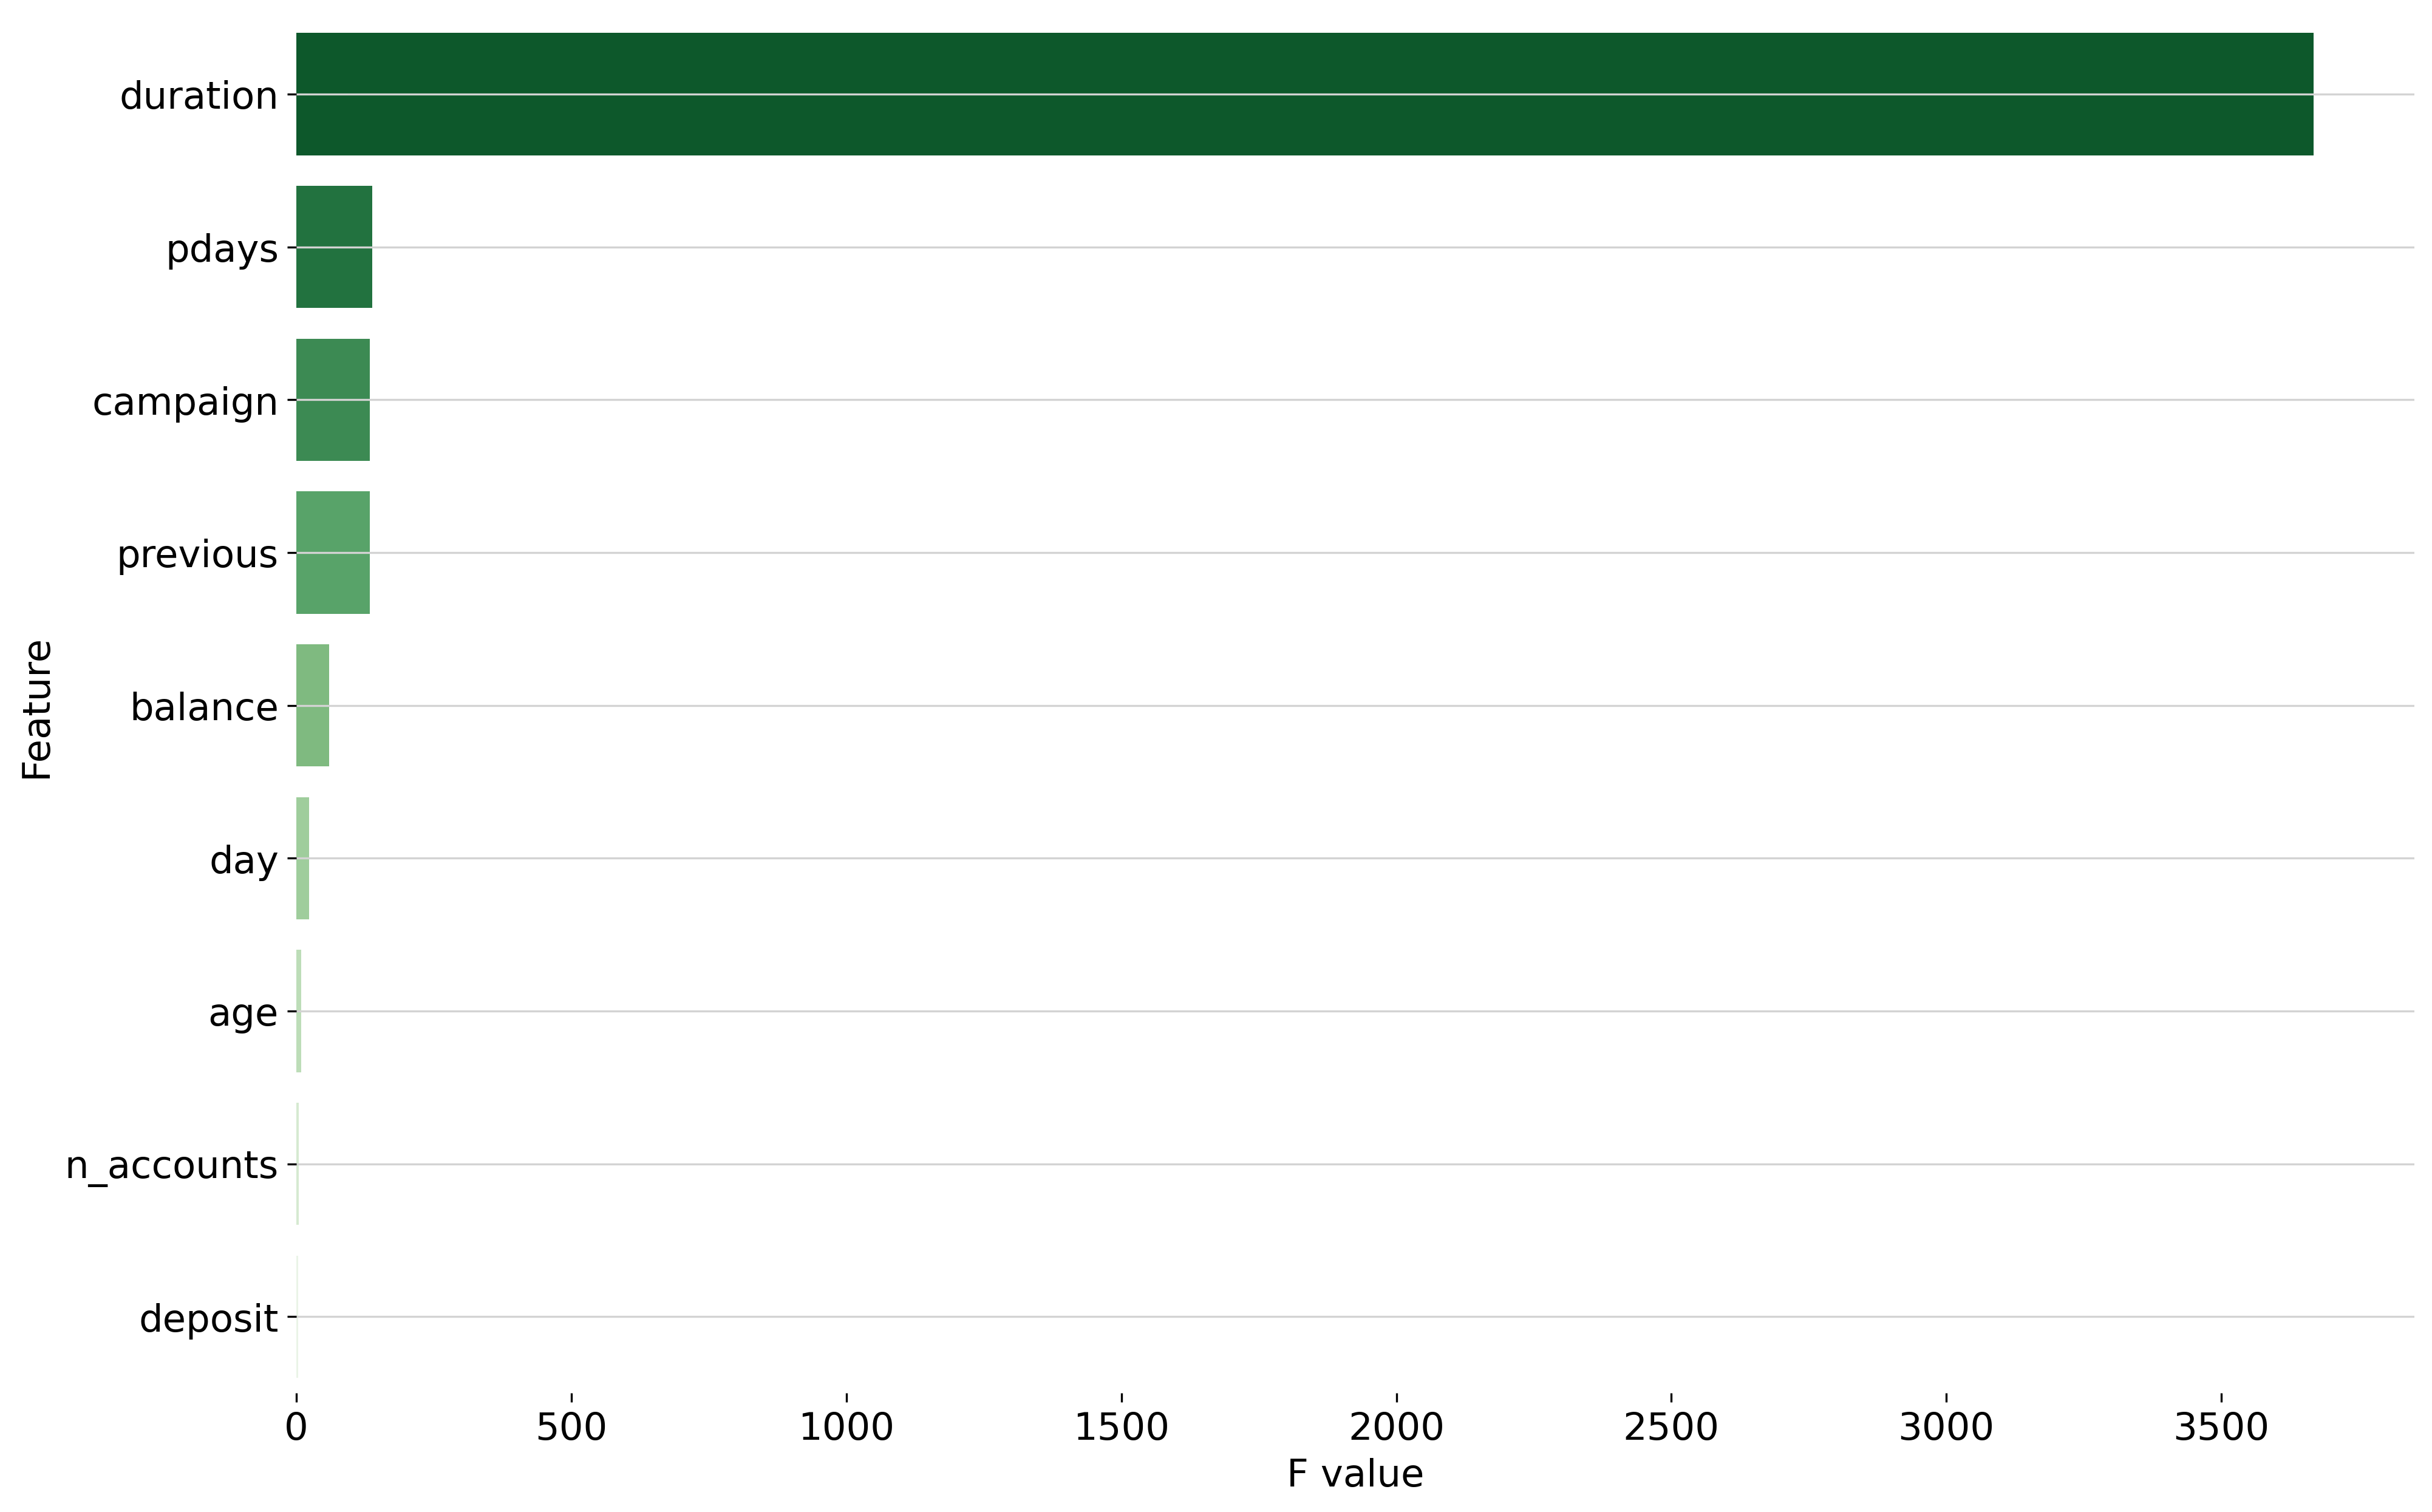

   F_value     Feature
0  3667.20    duration
1   137.74       pdays
2   133.63    campaign
3   133.53    previous
4    59.88     balance
5    22.74         day
6     8.68         age
7     4.67  n_accounts
8     2.80     deposit 

Top 6 feature(s) ['duration', 'pdays', 'campaign', 'previous', 'balance', 'day'] were selected based on highest F-value


,duration,pdays,campaign,previous,balance,day
0,121,-1,1,0,427,20
1,90,-1,3,0,-482,29
2,33,-1,2,0,0,12
3,978,-1,1,0,87,12
4,328,143,2,2,1445,26
...,...,...,...,...,...,...
12157,527,-1,3,0,2892,9
12158,510,-1,1,0,15,30
12159,144,-1,2,0,3158,3
12160,355,180,1,5,542,26


In [5]:
X, y = kgfarm.select_features(entity_df, dependent_variable='membership', select_by='statistics',
                             plot_correlation=True, plot_anova_test=True, show_f_value=True, f_value_threshold=10)
X